In [2]:
#tensorflux.graph
# Reference: http://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/
import networkx as nx

# _default_graph = None
# n = tfn.Single_Neuron_Network(input_size=1, output_size=1)
# n1 = tfn.Single_Neuron_Network(input_size=1, output_size=1)
# 레퍼런스하는 객체가 바뀌므로.


class Graph(nx.Graph):# 클래스를 만들 때는 두 줄을 new line
    """Represents a computational graph (a neural network)
    """

    def __init__(self):
        """Construct Graph"""
        self.operations = []
        self.placeholders = []
        self.variables = []
        super().__init__()


class Placeholder: # 값 유지용도 x
    """Represents a placeholder node that has to be provided with a value
       when computing the output of a computational graph
    """
    def __init__(self, name=None):
        """Construct placeholder
        """
        self.output = None
        self.consumers = [] # placeholder를 소비하는 변수인 operation노드를 의미한다.
        self.name = name

    def __str__(self): # 이 객체를 print할 때 찍히는 내용
        return self.name


class Variable: # 값 유지용도 o
    """Represents a variable (i.e. an intrinsic, changeable parameter of a computational graph).
    """

    def __init__(self, initial_value=None, name=None):
        """Construct Variable

        Args:
          initial_value: The initial value of this variable
        """
        self.value = initial_value
        self.output = None
        self.consumers = []
        self.name = name

    # value 등의 변수들이 private이 아니므로, 없어도 됨
    # def get_shape(self): # 추가됨.
    #     return self.value.shape
    #
    # def set_value(self, value): # 추가됨
    #     self.value = value

    def __str__(self):
        return self.name


class Operation:
    """Represents a graph node that performs a computation (forwaring operation).

    An `Operation` is a node in a `Graph` that takes zero or
    more objects as input, and produces zero or more objects
    as output.
    """

    def __init__(self, input_nodes=[], name=None):
        """Construct Forwarding Operation
        """
        self.input_nodes = input_nodes
        self.output = None

        # Initialize list of consumers (i.e. nodes that receive this operation's output as input)
        self.consumers = []
        self.name = name

        # Append this operation to the list of consumers of all input nodes
        for input_node in input_nodes:
            input_node.consumers.append(self) # 각각의 변수가 갖고 있는 컨슈머를 지금 오퍼레이션(자기자신)을 등록

    def forward(self):
        """Computes the output of this operation.
        "" Must be implemented by the particular operation.
        """
        pass

    def __str__(self):
        return self.name


class Add(Operation):#상속
    """Returns x + y element-wise.
    """

    def __init__(self, x, y, name=None):
        """Construct add

        Args:
          x: First summand node
          y: Second summand node
        """
        self.inputs = None #이 자식클래스에서 관리하는 값(실제값)
        super().__init__([x, y], name) #부모클래스의 생성자를 부름

    def forward(self, x_value, y_value):#상속받은 것을 오버라이드
        """Compute the output of the add operation

        Args:
          x_value: First summand value
          y_value: Second summand value
        """
        self.inputs = [x_value, y_value]
        return x_value + y_value # plus of numpy array


class Mul(Operation):
    """Returns x * y.
    """

    def __init__(self, x, y, name=None):
        """Construct add

        Args:
          x: First summand node
          y: Second summand node
        """
        self.inputs = None
        super().__init__([x, y], name)

    def forward(self, x_value, y_value):
        """Compute the output of the add operation

        Args:
          x_value: First summand value
          y_value: Second summand value
        """
        self.inputs = [x_value, y_value]
        return x_value * y_value


class Matmul(Operation):
    """Multiplies matrix x by matrix y, producing x * y.
    """

    def __init__(self, x, y, name=None):
        """Construct matmul

        Args:
          x: First matrix
          y: Second matrix
        """
        self.inputs = None
        super().__init__([x, y], name)

    def forward(self, x_value, y_value):# numpy 객체가 들어옴
        """Compute the output of the matmul operation

        Args:
          x_value: First matrix value
          y_value: Second matrix value
        """
        self.inputs = [x_value, y_value]
        return x_value.dot(y_value)

In [4]:
#tensorflux/initializer
# # -*- coding:utf-8 -*-
# import numpy as np

# class Initializer:
#     def __init__(self, shape, name):
#         self.shape = shape
#         self.name = name

#         self.param = None
#         self.initialize_param()

#     def initialize_param(self): # 상속을 의미
#         pass

#     def get_variable(self):
#         return self.param


# class Value_Assignment_Initializer(Initializer):
#     def __init__(self, value, name):
#         self.value = value
#         super().__init__([1], name)

#     def initialize_param(self):
#         self.param = Variable(self.value, name=self.name)


# class Zero_Initializer(Initializer):
#     def initialize_param(self):
#         self.param = Variable(np.zeros(shape=self.shape), name=self.name)


# class One_Initializer(Initializer):
#     def initialize_param(self):
#         self.param = Variable(np.ones(shape=self.shape), name=self.name)


# class Point_One_Initializer(Initializer):
#     def initialize_param(self):
#         self.param = Variable(np.ones(shape=self.shape) * 0.1, name=self.name)

# class Truncated_Normal_Initializer(Initializer): # functions.py
#     def __init__(self, shape, name, mean=0.0, sd=1.0, low=-1.0, upp=1.0):
#         self.mean = mean
#         self.sd = sd
#         self.low = low
#         self.upp = upp
#         super().__init__(shape, name)

#     def initialize_param(self):# functions.py
#         self.param = Variable(functions.get_truncated_normal(shape=self.shape,
#                                                            mean=self.mean,
#                                                            sd=self.sd,
#                                                            low=self.low,
#                                                            upp=self.upp), name=self.name)



# -*- coding:utf-8 -*-
import numpy as np


class Initializer:
    def __init__(self, shape, name, input_value = None):
        self.shape = shape
        self.name = name
        self.input_value = input_value
        self.param = None
        self.initialize_param()

    def initialize_param(self):
        self.param = Variable(self.input_value,name=self.name)
        # pass

    def get_variable(self):
        return self.param


class Value_Assignment_Initializer(Initializer):
    def __init__(self, value, name):
        self.value = value
        super().__init__([1], name)

    def initialize_param(self):
        self.param = Variable(self.value, name=self.name)


class Zero_Initializer(Initializer):
    def initialize_param(self):
        self.param = Variable(np.zeros(shape=self.shape), name=self.name)


class One_Initializer(Initializer):
    def initialize_param(self):
        self.param = Variable(np.ones(shape=self.shape), name=self.name)


class Randn_Initializer(Initializer):
    def initialize_param(self):
        self.param = Variable(np.random.randn(self.shape[0],self.shape[1]), name=self.name)


class Point_One_Initializer(Initializer):
    def initialize_param(self):
        self.param = Variable(np.ones(shape=self.shape) * 0.1, name=self.name)


class Truncated_Normal_Initializer(Initializer):
    def __init__(self, shape, name, mean=0.0, sd=1.0, low=-1.0, upp=1.0):
        self.mean = mean
        self.sd = sd
        self.low = low
        self.upp = upp
        super().__init__(shape, name)

    def initialize_param(self):
        self.param = tfg.Variable(get_truncated_normal(shape=self.shape,
                                                           mean=self.mean,
                                                           sd=self.sd,
                                                           low=self.low,
                                                           upp=self.upp), name=self.name)


In [5]:
#tensorflux/optimizers
# -*- coding:utf-8 -*-
import math
import numpy as np

# https://www.dropbox.com/s/ni4r8gyfr1lw2t3/02.Artificial_Single_Neuron.pdf?dl=0
# page 18,19,22,25,26
# 기울기가 줄어드는 전략으로..
class SGD:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.params = None

        #networks.py line44, ..

    def update(self, grads):
        for key in self.params.keys(): # params -W, b
            self.params[key].value = self.params[key].value - self.learning_rate * grads[key]


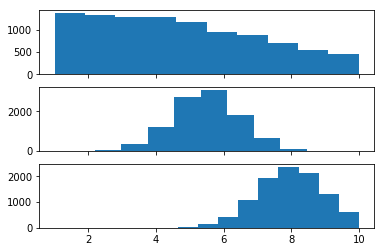

In [6]:
#functions
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import truncnorm


def get_truncated_normal(shape, mean=0, sd=1, low=0, upp=10):# Advanced...
    x = truncnorm(a=(low - mean) / sd, b=(upp - mean) / sd, loc=mean, scale=sd)
    num_elements = 1
    for dim in shape:
        num_elements *= dim
    x = x.rvs(num_elements)
    x = x.reshape(shape)
    return x


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def squared_error(output_value, target_value):
    return 0.5 * math.pow(output_value - target_value, 2)


if __name__ == "__main__": # test용 능# run 가
    x1 = get_truncated_normal(shape=(1, 10000), mean=2, sd=5, low=1, upp=10)
    # 평균, 표준편차 -> 랜덤값; 극단값은 low와 upp을 이용하여 자른다.
    # sd값을 조정해본다. 가로로 변한다.
    x2 = get_truncated_normal(shape=(1, 10000), mean=5.5, sd=1, low=1, upp=10)
    x3 = get_truncated_normal(shape=(1, 10000), mean=8, sd=1, low=1, upp=10)

    fig, ax = plt.subplots(3, sharex=True) # histogram
    ax[0].hist(x1.flatten())
    ax[1].hist(x2.flatten())
    ax[2].hist(x3.flatten())
    plt.show()

In [33]:
# Layers.py
# -*- coding:utf-8 -*-
import math
import numpy as np
import random

class Affine(Operation):
    """Returns w * x + b.
    """
    def __init__(self, w, x, b, name=None):
        """Construct Affine

        Args:
          x: Weight node, y: Input node, b: Bias node
        """
        self.inputs = None
        super().__init__([w, x, b], name)

    def forward(self, w_value, x_value, b_value):
        """Compute the output of the add operation

        Args:
          x_value: Weight value, y_value: Input value, b_value: Bias value
        """
        self.inputs = [w_value, x_value, b_value]
        # return np.matmul(x_value, w_value) + b_value # [Note] Matmax Order
        return x_value.dot(w_value) + b_value  # [Note] Matmax Order

    def backward(self):
        pass

    def __str__(self):
        return "Affine: " + self.name


class Affine2(Operation):
    def __init__(self, w, x1, x2, b, name=None):
        self.inputs = None
        super().__init__([w,x1,x2,b], name)

    def forward(self, w_value, x1_value, x2_value, b_value):
        self.inputs = [w_value,x1_value,x2_value,b_value]
        x_input = np.asarray([x1_value, x2_value,]).T

        # return (w_value[0]*x1_value+w_value[1]*x2_value)+b_value
        return x_input.dot(w_value) + b_value

    def backward(self, w_value, x1_value, x2_value, b_value,error):
        pass

    def __str__(self):
        return "Affine2: " + self.name


class ReLU(Operation):
    def __init__(self, u, name=None):
        """Construct ReLU

        Args:
          u: affine node. RuLU 다음에 튀어나는 값이 u 노드가 됨.
        """
        self.inputs = None
        self.mask = None
        super().__init__([u], name)

    def forward(self, u_value):
        self.inputs = [u_value]

        if type(u_value) == np.ndarray:
            self.mask = (u_value <= 0)
            # [-1.0, 2.0, -2.0] --> [True, False, True]
            out = u_value.copy()
            out[self.mask] = 0
        else:
            if u_value <= 0:
                out = 0.0
            else:
                out = u_value
        return out # scalar, array 모두 커버 중

    def backward(self, din):
        pass

    def __str__(self):
        return "ReLU: " + self.name


class Sigmoid(Operation):
    def __init__(self, u, name=None):
        """Construct ReLU

        Args:
          u: affine node
        """
        self.inputs = None
        self.out = None
        super().__init__([u], name)

    def forward(self, u_value):
        self.inputs = [u_value]
        self.out = functions.sigmoid(u_value) # function.py
        return self.out

    def backward(self, din):
        pass

    def __str__(self):
        return "Sigmoid: " + self.name


class SquaredError(Operation):
    def __init__(self, forward_final_output, target, name=None):
        """Construct SquaredError

        Args:
          output: output node
          forward_final_output: feedforward의 결과물
        """
        self.inputs = None
        super().__init__([forward_final_output, target], name)

    def forward(self, forward_final_output_value, target_value):
        self.inputs = [forward_final_output_value, target_value]
        return squared_error(forward_final_output_value, target_value) # function.py

    def backward(self, din):
        pass

    def __str__(self):
        return "SquaredError:" + self.name

In [18]:
#tensorflux/enums
from enum import Enum

class Initializer(Enum):
    Zero = Zero_Initializer # enum 변수 , 상수 # 클래스 자체가 할당된다
    One = One_Initializer
    Point_One = Point_One_Initializer
    Truncated_Normal = Truncated_Normal_Initializer
    Value_Assignment = Value_Assignment_Initializer
    Randn = Randn_Initializer


class Optimizer(Enum):
    SGD = SGD # optimizers.py


class Activator(Enum):
    Sigmoid = Sigmoid,
    ReLU = ReLU

In [9]:
# -*- coding:utf-8 -*-

import numpy as np


class Data:
    def __init__(self):
        self.num_train_data = len(self.training_input)
        self.num_validation_data = len(self.validation_input)
        self.num_test_data = len(self.test_input)


class Simple_Function_Data(Data):
    # f(x)=10𝑥+4
    def __init__(self):
        self.training_input = np.array([1.0, 2.0, 3.0])
        self.training_target = np.array([14.0, 24.0, 34.0])

        self.validation_input = np.array([1.5, 2.5])#1.0과 2.0의 사잇값
        self.validation_target = np.array([19.0, 29.0])

        self.test_input = np.array([0, 4.0])
        self.test_target = np.array([4.0, 44.0])

        super().__init__()

        #총 9개의 변수가 잡힘


class Or_Gate_Data(Data):
    def __init__(self):
        self.training_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.training_target = np.array([0.0, 1.0, 1.0, 1.0])

        self.validation_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.validation_target = np.array([0.0, 1.0, 1.0, 1.0])

        self.test_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.test_target = np.array([0.0, 1.0, 1.0, 1.0])
        super().__init__()


class And_Gate_Data(Data):
    def __init__(self):
        self.training_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.training_target = np.array([0.0, 0.0, 0.0, 1.0])

        self.validation_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.validation_target = np.array([0.0, 0.0, 0.0, 1.0])

        self.test_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.test_target = np.array([0.0, 0.0, 0.0, 1.0])
        super().__init__()


class Xor_Gate_Data(Data):
    def __init__(self):
        self.training_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.training_target = np.array([0.0, 1.0, 1.0, 0.0])

        self.validation_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.validation_target = np.array([0.0, 1.0, 1.0, 0.0])

        self.test_input = np.array([(0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0)])
        self.test_target = np.array([0.0, 1.0, 1.0, 0.0])
        super().__init__()

In [10]:
#Session
# -*- coding:utf-8 -*-

# Reference: http://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs
import numpy as np


class Session:
    """Represents a particular execution of a computational graph.
    """

    def run(self, operation, feed_dict={}, vervose=True):
        """Computes the output of an operation
        
        Args:
          operation: The operation whose output we'd like to compute.
          feed_dict: A dictionary that maps placeholders to values for this session
        """

        # Perform a post-order traversal of the graph to bring the nodes into the right order
        nodes_postorder = self.traverse_postorder(operation)

        # Iterate all nodes to determine their value
        for node in nodes_postorder:
            if type(node) == Placeholder:
                # Set the node value to the placeholder value from feed_dict
                node.output = feed_dict[node]
            elif type(node) == Variable:
                # Set the node value to the variable's value attribute
                node.output = node.value
            else: # Operation
                # Get the input values for this operation from node_values
                node.inputs = [input_node.output for input_node in node.input_nodes]

                # Compute the output of this operation
                node.output = node.forward(*node.inputs)

            # print(node.output) # 주석 풀던가 말던가!

            # Convert lists to numpy arrays
            if type(node.output) is not np.ndarray:
                node.output = np.asarray(node.output)

            if vervose:
                print("Node: {:>10} - Output Value: {:>5}".format(str(node), str(node.output)))

        # Return the requested node value
        return operation.output

    @staticmethod
    def traverse_postorder(operation):
        """Performs a post-order traversal, returning a list of nodes
        in the order in which they have to be computed

        Args:
           operation: The operation to start traversal at
        """

        nodes_postorder = []

        def recursive_visit(node):
            if isinstance(node, Operation):
                for input_node in node.input_nodes:
                    recursive_visit(input_node)
            nodes_postorder.append(node)

        recursive_visit(operation)
        return nodes_postorder

In [39]:
#Networks..
from collections import OrderedDict
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


class Neural_Network(Graph): # base class
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size

        self.input_node = None # 붙일 노드
        self.target_node = None # 붙일 노드

        self.activator = None # 네트워크 내에서 활용할 객체
        self.initializer = None
        self.optimizer = None

        self.params = OrderedDict() # 순서를 관리하는 dictionary
        # a = {}대신에, a = OrderdDict()
        # a[1] = 'aaa'
        # a[2] = 'bbb'
        # dictionary는 순서 보장이 안됨

        self.output = None # Optimizer붙이기 전, feed_forward 통과하여 나오는 값
        self.error = None

        self.session = Session()
        super().__init__() # graph..

    def set_data(self, input_node, target_node):
        self.input_node = input_node
        self.target_node = target_node

    def initialize_param(self, initializer=Initializer.Zero.value): # enum이 쓰이는 방식
        # Zero.value ;enum 문법
        # Zero_Initializer 클래스가 value가 됨
        pass

    def layering(self, activator=Activator.ReLU.value):
        pass

    def set_optimizer(self, optimizer=Optimizer.SGD.value, learning_rate=0.01):
        self.optimizer = optimizer(learning_rate=learning_rate)
        self.optimizer.params = self.params

    def numerical_derivative(self, session, feed_data):
        delta = 1e-4  # 0.0001

        grads = OrderedDict()

        for param_key, param in self.params.items():
            temp_val = param.value

            # f(x + delta) 계산
            param.value = param.value + delta
            fxh1 = session.run(self.error, feed_dict=feed_data, vervose=False)

            param.value = temp_val

            # f(x - delta) 계산
            param.value = param.value - delta
            fxh2 = session.run(self.error, feed_dict=feed_data, vervose=False)

            # f(x + delta) - f(x - delta) / 2 * delta 계산
            grads[param_key] = (fxh1 - fxh2) / (2 * delta)
            param.value = temp_val
        return grads

    # https://www.dropbox.com/s/ni4r8gyfr1lw2t3/02.Artificial_Single_Neuron.pdf?dl=0
    # page 18
    def learning(self, max_epoch, data, x, target):
        for epoch in range(max_epoch):
            sum_train_error = 0.0
            for idx in range(data.num_train_data):
                train_input_data = data.training_input[idx]
                train_target_data = data.training_target[idx]

                # this file, line 51
                # https://www.dropbox.com/s/ni4r8gyfr1lw2t3/02.Artificial_Single_Neuron.pdf?dl=0
                # page 23, 24
                grads = self.numerical_derivative(self.session, {x: train_input_data, target: train_target_data})
                self.optimizer.update(grads=grads)
                sum_train_error += self.session.run(self.error, {x: train_input_data, target: train_target_data}, vervose=False)

            sum_validation_error = 0.0
            for idx in range(data.num_validation_data): # 검증용 데이터에서는 update를 하지 않음
                validation_input_data = data.validation_input[idx]
                validation_target_data = data.validation_target[idx]
                sum_validation_error += self.session.run(self.error,
                                                         {x: validation_input_data, target: validation_target_data},
                                                        vervose=False)
            if(epoch%1000==0):
                print("Epoch {:3d} Completed - Average Train Error: {:7.6f} - Average Validation Error: {:7.6f}".format(
                    epoch, sum_train_error / data.num_train_data, sum_validation_error / data.num_validation_data))
            
    def get_params_str(self):
        params_str = ""
        for param_key, param in self.params.items():
            params_str = params_str + param_key + ": " + str(param.value) + ", "
        params_str = params_str[0:-2]
        return params_str

    def print_feed_forward(self, num_data, input_data, target_data, x):
        for idx in range(num_data):
            train_input_data = input_data[idx]
            train_target_data = target_data[idx]

            # output; by ReLU
            # vervose True해보기
            output = self.session.run(self.output, {x: train_input_data}, vervose=False)
            print("Input Data: {:>5}, Feed Forward Output: {:>6}, Target: {:>6}".format(
                str(train_input_data), np.array2string(output), str(train_target_data)))

    def draw_and_show(self):
        nx.draw_networkx(self, with_labels=True)
        plt.show(block=True)


class Single_Neuron_Network(Neural_Network):
    def __init__(self, input_size, output_size):
        super().__init__(input_size, output_size)

    def initialize_scalar_param(self, value1, value2,
                                initializer=Initializer.Value_Assignment.value):
        self.params['W0'] = initializer(value1, name='W0').get_variable()
        #initializer클래스의 생성자 호출. 즉 initializer(value1, name='W0')까지가 객체 생성
        #initializers.py line22-, line 18-19
        self.params['b0'] = initializer(value2, name='b0').get_variable()
        # Variable객체 두 개의 레퍼런스가 param에 할당되는 격

    def initialize_param(self, initializer=Initializer.Zero.value):
        self.params['W0'] = initializer(shape=(self.input_size, self.output_size), name='W0').get_variable()
        self.params['b0'] = initializer(shape=(self.output_size,), name='b0').get_variable()

    def layering(self, activator=Activator.ReLU.value): # layers.py
        self.activator = activator
        u = Affine(self.params['W0'], self.input_node, self.params['b0'], name="A")
        self.output = activator(u, name="O")
        self.error = SquaredError(self.output, self.target_node, name="SE")
        if isinstance(self, nx.Graph):
            self.add_edge(self.params['W0'], u)
            self.add_edge(self.input_node, u)
            self.add_edge(self.params['b0'], u)
            self.add_edge(u, self.output)
            self.add_edge(self.output, self.error)
            self.add_edge(self.error, self.target_node)


class Two_Neurons_Network(Neural_Network):
    def __init__(self, input_size, output_size):
        super().__init__(input_size, output_size)

    def initialize_param(self, initializer=Initializer.Zero.value):
        self.params['W0'] = initializer(shape=(self.input_size, self.output_size), name='W0').get_variable()
        self.params['b0'] = initializer(shape=(self.output_size,), name='b0').get_variable()
        self.params['W1'] = initializer(shape=(self.output_size, self.output_size), name='W1').get_variable()
        self.params['b1'] = initializer(shape=(self.output_size,), name='b1').get_variable()

    def layering(self, activator=Activator.ReLU.value):
        self.activator = activator
        u0 = Affine(self.params['W0'], self.input_node, self.params['b0'], name="A0")
        o0 = activator(u0, name="O0") # ReLU 클래스 생성자 격임
        u1 = Affine(self.params['W1'], o0, self.params['b1'], name="A1")
        self.output = activator(u1, name="O1")
        self.error = SquaredError(self.output, self.target_node, name="SE")
        if isinstance(self, nx.Graph):
            self.add_edge(self.params['W0'], u0)
            self.add_edge(self.input_node, u0)
            self.add_edge(self.params['b0'], u0)
            self.add_edge(u0, o0)
            self.add_edge(self.params['W1'], u1)
            self.add_edge(o0, u1)
            self.add_edge(self.params['b1'], u1)
            self.add_edge(u1, self.output)
            self.add_edge(self.output, self.error)
            self.add_edge(self.error, self.target_node)
            
# Three Neuron

Input Data: [ 0.  0.], Feed Forward Output: [ 0.11], Target:    0.0
Input Data: [ 1.  0.], Feed Forward Output: [ 0.12], Target:    0.0
Input Data: [ 0.  1.], Feed Forward Output: [ 0.12], Target:    0.0
Input Data: [ 1.  1.], Feed Forward Output: [ 0.13], Target:    1.0
Epoch   0 Completed - Average Train Error: 0.098163 - Average Validation Error: 0.098890
Input Data: [ 0.  0.], Feed Forward Output: [ 0.20059821], Target:    0.0
Input Data: [ 1.  0.], Feed Forward Output: [ 0.27836566], Target:    0.0
Input Data: [ 0.  1.], Feed Forward Output: [ 0.27836566], Target:    0.0
Input Data: [ 1.  1.], Feed Forward Output: [ 0.35613312], Target:    1.0


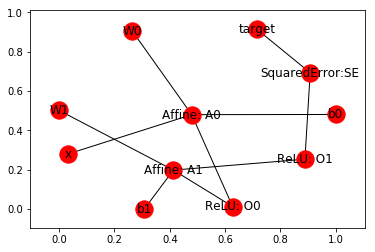

In [40]:
# Two Neuron
# Reference: http://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/

n = Two_Neurons_Network(input_size=2, output_size=1)

x = Placeholder(name="x")
target = Placeholder(name="target")
n.set_data(x, target)
n.initialize_param(initializer=Initializer.Point_One.value)
n.layering(activator=Activator.ReLU.value)
n.set_optimizer(optimizer=Optimizer.SGD.value, learning_rate=0.01)

data = And_Gate_Data()

n.print_feed_forward(num_data=data.num_train_data, input_data=data.training_input, target_data=data.training_target, x=x)
n.learning(max_epoch=100, data=data, x=x, target=target)
n.print_feed_forward(num_data=data.num_test_data, input_data=data.test_input, target_data=data.test_target, x=x)

n.draw_and_show()



In [41]:
class Three_Neurons_Network(Neural_Network):
    def __init__(self, input_size, output_size):
        super().__init__(input_size, output_size)

    def initialize_param(self, initializer=Initializer.Zero.value):
        self.params['W0'] = initializer(shape=(self.input_size, self.output_size), name='W0').get_variable()
        self.params['b0'] = initializer(shape=(self.output_size,), name='b0').get_variable()
        self.params['W1'] = initializer(shape=(self.output_size, self.output_size), name='W1').get_variable()
        self.params['b1'] = initializer(shape=(self.output_size,), name='b1').get_variable()
        self.params['W2'] = initializer(shape=(self.output_size, self.output_size), name='W2').get_variable()
        self.params['b2'] = initializer(shape=(self.output_size,), name='b2').get_variable()

    def layering(self, activator=Activator.ReLU.value):
        self.activator = activator
        u0 = Affine(self.params['W0'], self.input_node, self.params['b0'], name="A0")
        o0 = activator(u0, name="O0") # ReLU 클래스 생성자 격임
        u1 = Affine(self.params['W1'], o0, self.params['b1'], name="A1")
        o1 = activator(u1, name="O1")  # ReLU 클래스 생성자 격임
        u2 = Affine(self.params['W2'], o1, self.params['b2'], name="A2")
        self.output = activator(u2, name="O2")
        self.error = SquaredError(self.output, self.target_node, name="SE")
        if isinstance(self, nx.Graph):
            self.add_edge(self.params['W0'], u0)
            self.add_edge(self.input_node, u0)
            self.add_edge(self.params['b0'], u0)
            self.add_edge(u0, o0)
            
            self.add_edge(self.params['W1'], u1)
            self.add_edge(self.input_node, u1)
            self.add_edge(self.params['b1'], u1)
            self.add_edge(u1, o1)
            
            self.add_edge(self.params['W2'], u2)
            self.add_edge(o0, u2)
            self.add_edge(o1, u2)
            self.add_edge(self.params['b2'], u2)
            self.add_edge(u2, self.output)
            self.add_edge(self.output, self.error)
            self.add_edge(self.error, self.target_node)

Input Data: [ 0.  0.], Feed Forward Output: [ 0.111], Target:    0.0
Input Data: [ 1.  0.], Feed Forward Output: [ 0.112], Target:    1.0
Input Data: [ 0.  1.], Feed Forward Output: [ 0.112], Target:    1.0
Input Data: [ 1.  1.], Feed Forward Output: [ 0.113], Target:    0.0
Epoch   0 Completed - Average Train Error: 0.159793 - Average Validation Error: 0.159875
Input Data: [ 0.  0.], Feed Forward Output: [ 0.49656832], Target:    0.0
Input Data: [ 1.  0.], Feed Forward Output: [ 0.49728133], Target:    1.0
Input Data: [ 0.  1.], Feed Forward Output: [ 0.49728133], Target:    1.0
Input Data: [ 1.  1.], Feed Forward Output: [ 0.49799434], Target:    0.0


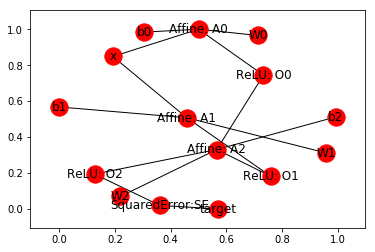

In [42]:
# Three Neuron
# Reference: http://www.deepideas.net/deep-learning-from-scratch-i-computational-graphs/
n = Three_Neurons_Network(input_size=2, output_size=1)

x = Placeholder(name="x")
target = Placeholder(name="target")
n.set_data(x, target)
n.initialize_param(initializer=Initializer.Point_One.value)
n.layering(activator=Activator.ReLU.value)
n.set_optimizer(optimizer=Optimizer.SGD.value, learning_rate=0.09)

data = Xor_Gate_Data()

n.print_feed_forward(num_data=data.num_train_data, input_data=data.training_input, target_data=data.training_target, x=x)
n.learning(max_epoch=100, data=data, x=x, target=target)
n.print_feed_forward(num_data=data.num_test_data, input_data=data.test_input, target_data=data.test_target, x=x)

n.draw_and_show()




In [43]:
# 황재민님 코드
class Three_Neurons_Network(Neural_Network):
    def __init__(self, input_size, output_size):
        super().__init__(input_size, output_size)

    def initialize_param(self, initializer=Initializer.Zero.value):
        self.params['W0'] = initializer(shape=(self.input_size, self.output_size), name='W0').get_variable()
        self.params['b0'] = Initializer.Point_One.value(shape=(self.output_size,), name='b0').get_variable()
        self.params['W1'] = initializer(shape=(self.input_size, self.output_size), name='W1').get_variable()
        self.params['b1'] = Initializer.Point_One.value(shape=(self.output_size,), name='b1').get_variable()
        self.params['W2'] = initializer(shape=(self.input_size, self.output_size), name='W2').get_variable()
        self.params['b2'] = Initializer.Point_One.value(shape=(self.output_size,), name='b2').get_variable()
        print(self.get_params_str)

    def layering(self, activator=Activator.ReLU.value):
        self.activator = activator
        u0 = Affine(self.params['W0'], self.input_node, self.params['b0'], name="A0")
        o0 = activator(u0, name="O0")
        u1 = Affine(self.params['W1'], self.input_node, self.params['b1'], name="A1")
        o1 = activator(u1, name="O1")
        u2 = Affine2(self.params['W2'], o0, o1, self.params['b2'], name="A2")

        self.output = activator(u2, name="O2")
        # self.output = activator(z1, name="O2")
        self.error = SquaredError(self.output, self.target_node, name="SE")

        if isinstance(self, nx.Graph):
            self.add_edge(self.params['W0'], u0)
            self.add_edge(self.input_node, u0)
            self.add_edge(self.params['b0'], u0)
            self.add_edge(u0, o0)

            self.add_edge(self.params['W1'], u1)
            self.add_edge(self.input_node, u1)
            self.add_edge(self.params['b1'], u1)
            self.add_edge(u1, o1)

            self.add_edge(self.params['W2'], u2)
            self.add_edge(o0, u2)
            self.add_edge(o1, u2)
            self.add_edge(self.params['b2'], u2)
            self.add_edge(u2, self.output)
            self.add_edge(self.output, self.error)
            self.add_edge(self.error, self.target_node)

<bound method Neural_Network.get_params_str of <__main__.Three_Neurons_Network object at 0x116ffeef0>>
Input Data: [ 0.  0.], Feed Forward Output: [[ 0.07262124]], Target:    0.0
Input Data: [ 1.  0.], Feed Forward Output: [[ 0.]], Target:    1.0
Input Data: [ 0.  1.], Feed Forward Output: [[ 0.09294592]], Target:    1.0
Input Data: [ 1.  1.], Feed Forward Output: [[ 0.09173986]], Target:    0.0
Epoch   0 Completed - Average Train Error: 0.228911 - Average Validation Error: 0.229021
Epoch 1000 Completed - Average Train Error: 0.134847 - Average Validation Error: 0.135262
Epoch 2000 Completed - Average Train Error: 0.131781 - Average Validation Error: 0.132150
Epoch 3000 Completed - Average Train Error: 0.127061 - Average Validation Error: 0.127394
Epoch 4000 Completed - Average Train Error: 0.124780 - Average Validation Error: 0.125101
Epoch 5000 Completed - Average Train Error: 0.124693 - Average Validation Error: 0.125012
Epoch 6000 Completed - Average Train Error: 0.124683 - Average

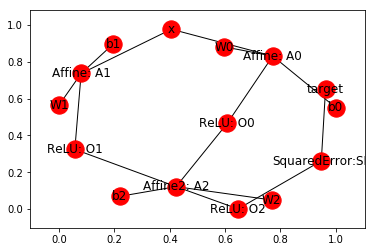

In [46]:
n = Three_Neurons_Network(input_size=2, output_size=1)

x = Placeholder(name="x")
target = Placeholder(name="target")
n.set_data(x, target)
# n.initialize_param(initializer=tfe.Initializer.Point_One.value)
n.initialize_param(initializer=Initializer.Randn.value)
n.layering(activator=Activator.ReLU.value)
n.set_optimizer(optimizer=Optimizer.SGD.value, learning_rate=0.00125)

data = Xor_Gate_Data()

n.print_feed_forward(num_data=data.num_train_data, input_data=data.training_input, target_data=data.training_target, x=x)
n.learning(max_epoch=10000, data=data, x=x, target=target)
n.print_feed_forward(num_data=data.num_test_data, input_data=data.test_input, target_data=data.test_target, x=x)

n.draw_and_show()
